Demo notebook for basic [Dask](https://dask.pydata.org) functionality. For an
intro to `Dask`, see this [blog
post](http://matthewrocklin.com/blog/work/2017/01/17/dask-images), as well as
this [video](https://www.youtube.com/watch?v=RA_2qdipVng) from the main
developer.

In [1]:
import h5py
import dask.array as da

This will run using all the cores on the host machine. For a distributed HPC
environment, such as `Hypnos`, it's better to use these
[instructions](https://distributed.readthedocs.io/en/latest/setup.html#using-
mpi), together with a submit script:

In [ ]:
#PBS -N dask
#PBS -l nodes=4:ppn=16
module load openmpi

mpiexec -n 4 -npernode 1 dask-mpi --nthreads 1 --interface
ib0 --scheduler-file /path/to/scheduler.json

In [47]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:35251 Dashboard: http://127.0.0.1:41361/status,Cluster Workers: 8 Cores: 8 Memory: 16.70 GB


In [48]:
h5_fname = './h5/h5_all_50000.h5'
h5_file = h5py.File(h5_fname, 'r')
e_path= '/data/50000/particles/e'
electrons = h5_file[e_path]
weighting = electrons['weighting']

In [49]:
n_datapoints = weighting.size

In [50]:
n_datapoints

1746090

Now we create a [dask array from hdf5 data](http://dask.pydata.org/en/latest/examples/array-hdf5.html).

In [51]:
w = da.from_array(weighting, chunks=(n_datapoints//7,))

In [52]:
w

dask.array<array, shape=(1746090,), dtype=float32, chunksize=(249441,)>

In [53]:
w.compute()

array([ 9890.1015625,  9890.1015625,  9890.1015625, ...,  9890.1015625,
        9890.1015625,  9890.1015625], dtype=float32)

In [ ]:
# mask = da.random.randint(2, size=n_datapoints, chunks=(n_datapoints//7,))

In [54]:
w.sum()

dask.array<sum-aggregate, shape=(), dtype=float32, chunksize=()>

For visualization, `graphviz` is required.

In [ ]:
sudo apt install graphviz
pip install graphviz

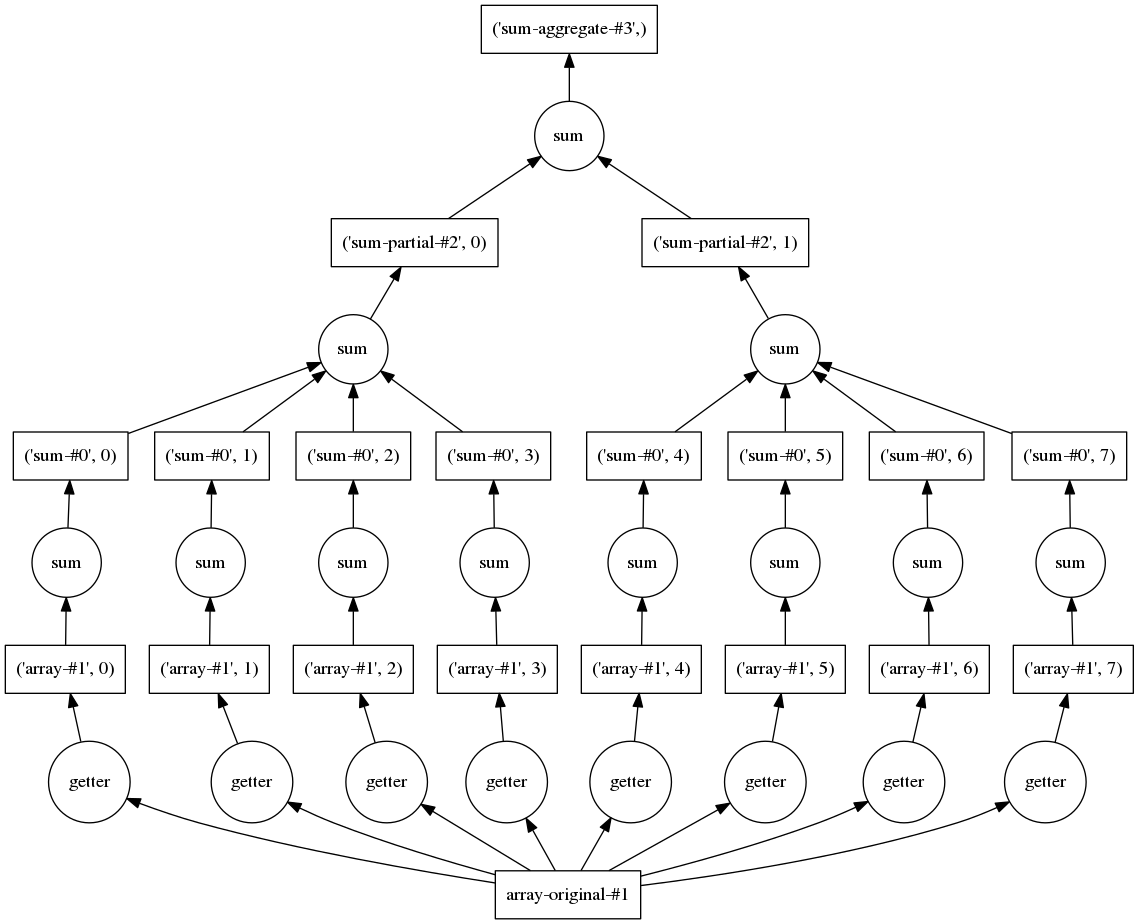

In [55]:
w.sum().visualize()

In [56]:
w.sum().compute()

1.7269002e+10

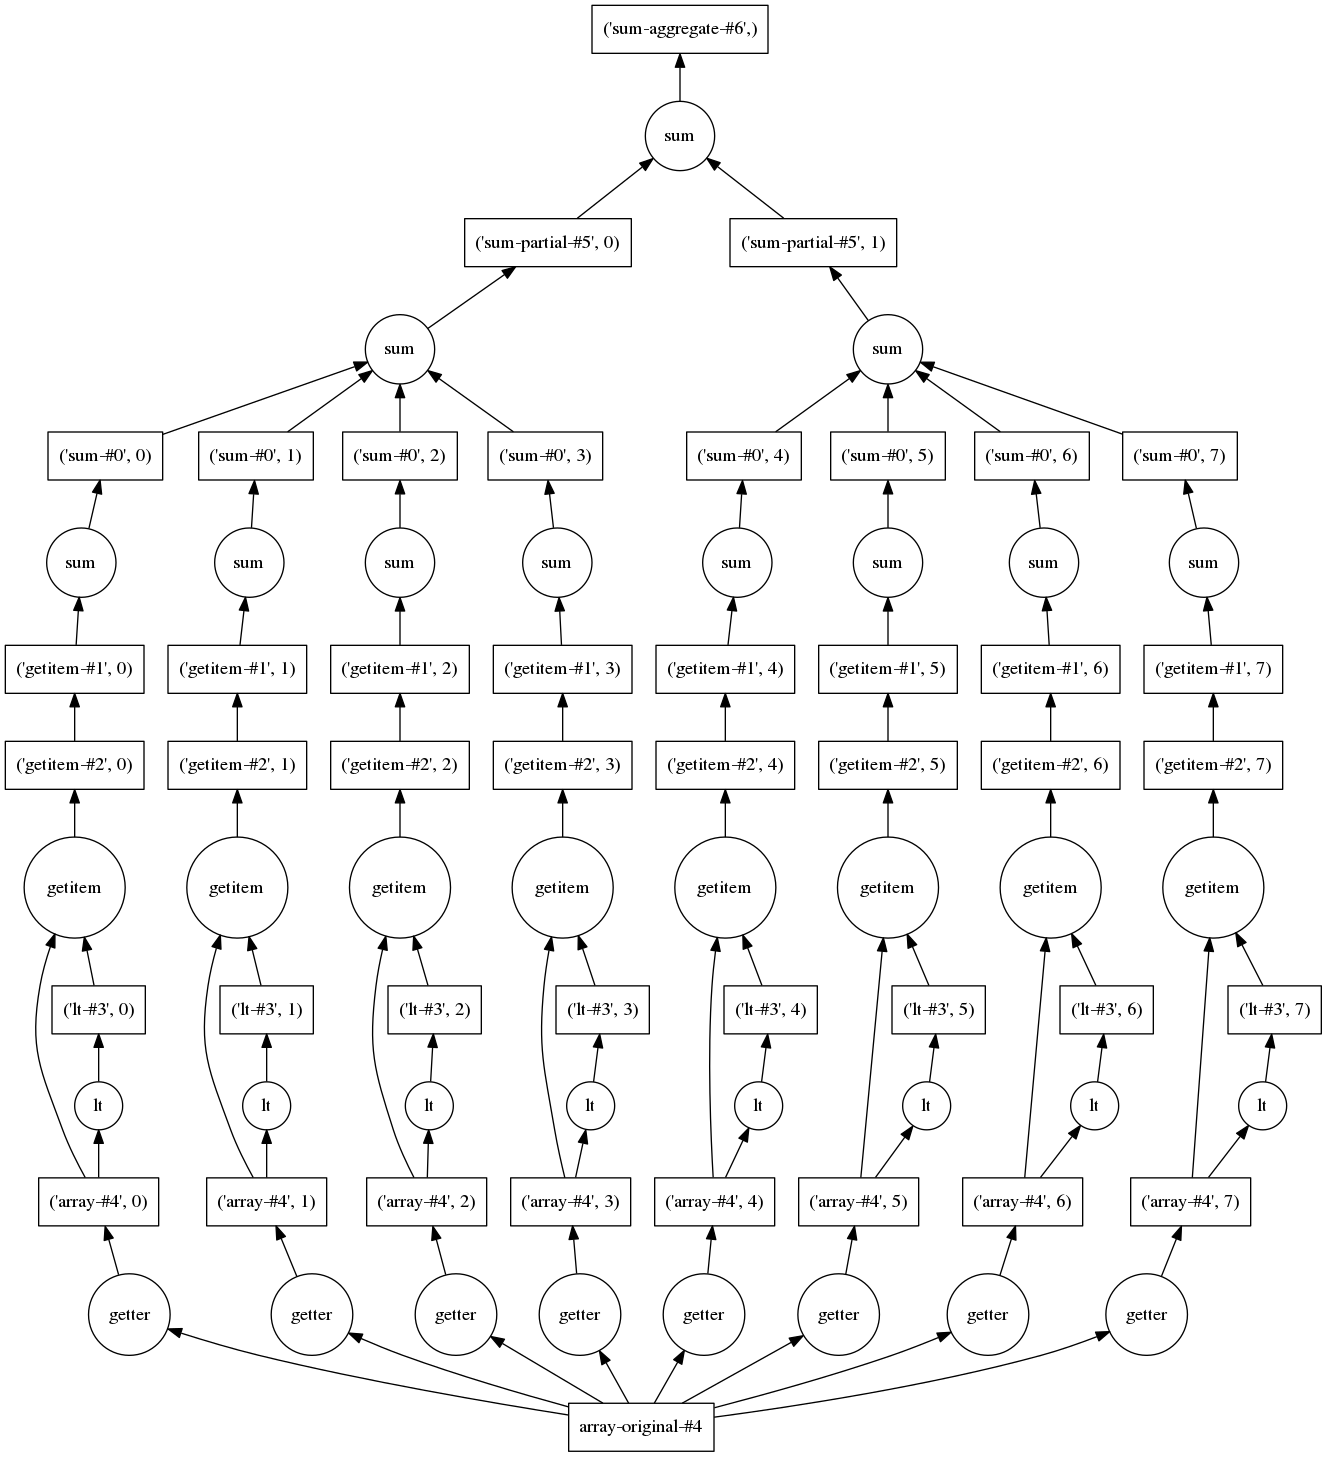

In [57]:
w[w < 9890].sum().visualize()

In [59]:
w[w < 9890].sum().compute()

29580.086